The purpose of this notebook is to investigate the Schubert results. Specifically, it looks like 100% of tests are being rejected by qvalue at an alpha cutoff of 0.1. That seems fishy, let's investigate!

In [82]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('white')

In [83]:
fpvals = 'schubert-sb-table.txt'
fotu = 'data/cdi_schubert_results/RDP/cdi_schubert.otu_table.100.denovo.rdp_assigned'
fmeta = 'data/cdi_schubert_results/cdi_schubert.metadata.txt'

pvals = pd.read_csv(fpvals, sep=' ')
pvals.index = pvals['otu']
df = pd.read_csv(fotu, sep='\t', index_col=0).T
abundf = df.divide(df.sum(axis=1), axis=0)
meta = pd.read_csv(fmeta, sep='\t', index_col=0)

In [84]:
pvals.head()

,otu,kingdom,phylum,class,order,family,genus,species,denovo,pval,...,ihw-a06,ihw-a07,ihw-a08,ihw-a09,ihw-a10,bl-df02,bl-df03,bl-df04,bl-df05,lfdr
otu,,,,,,,,,,,,,,,,,,,,,
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Parabacteroides;s__;d__denovo1106,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Porphyromonadaceae,g__Parabacteroides,s__,d__denovo1106,0.000735,...,0.003986,0.002969,0.002723,0.003687,0.003023,0.000008,0.000053,0.000075,0.000087,0.000093
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo3059,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__,d__denovo3059,0.001289,...,0.002752,0.003046,0.003377,0.003489,0.003023,0.000322,0.000357,0.000327,0.000293,0.000565
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo3058,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__,d__denovo3058,0.023291,...,0.033242,0.030128,0.033293,0.027844,0.029860,0.002890,0.003288,0.003069,0.002788,0.003254
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo3051,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__,d__denovo3051,0.141367,...,0.118584,0.139178,0.153177,0.124121,0.136450,0.014997,0.016601,0.015223,0.013613,0.011231
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Blautia;s__;d__denovo3050,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__Blautia,s__,d__denovo3050,0.227920,...,0.238456,0.207715,0.237654,0.191625,0.208124,0.035508,0.036057,0.031066,0.026076,0.046703


In [85]:
df.head()

,k__Bacteria;p__Firmicutes;c__Negativicutes;o__Selenomonadales;f__Veillonellaceae;g__Veillonella;s__;d__denovo5393,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Blautia;s__;d__denovo16247,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Barnesiella;s__;d__denovo15142,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Parabacteroides;s__;d__denovo1106,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__;s__;d__denovo15568,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo5395,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo3059,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo3058,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Anaerostipes;s__;d__denovo14681,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo16248,...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Lachnospiracea_incertae_sedis;s__;d__denovo19198,k__Bacteria;p__Firmicutes;c__;o__;f__;g__;s__;d__denovo19199,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Faecalibacterium;s__;d__denovo15143,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__;s__;d__denovo8645,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__;g__;s__;d__denovo16243,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes;s__;d__denovo1102,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo13548,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Roseburia;s__;d__denovo16245,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Oscillibacter;s__;d__denovo15744,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__;s__;d__denovo1104
DA01071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DA00953,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DA01134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DA01335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DA00897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
meta.head()

,submitted_to_insdc,investigation_type,project_name,experimental_factor,lat_lon,geo_loc_name,biome,feature,material,env_package,...,Surgery6mos,Vegetarian,ResidenceCdiff,weight,disease_stat,body_product,tot_mass,perturbation,samp_store_temp,DiseaseState
sample_id,,,,,,,,,,,,,,,,,,,,,
DA00006,F,metagenomic,Gut Microbiome and CDI,C. difficile & diarrheal status,42.282026 -83.733850,USA:Michigan:Ann Arbor,hospital,UniversityofMichigan,feces,human-gut,...,yes,no,no,200-249,DiarrhealControl,feces,NaN,None,-20.0,nonCDI
DA00044,F,metagenomic,Gut Microbiome and CDI,C. difficile & diarrheal status,42.282026 -83.733850,USA:Michigan:Ann Arbor,hospital,UniversityofMichigan,feces,human-gut,...,yes,no,no,Unknown,Case,feces,NaN,None,-20.0,CDI
DA00065,F,metagenomic,Gut Microbiome and CDI,C. difficile & diarrheal status,42.282026 -83.733850,USA:Michigan:Ann Arbor,hospital,UniversityofMichigan,feces,human-gut,...,yes,no,no,Unknown,Case,feces,NaN,None,-20.0,CDI
DA00108,F,metagenomic,Gut Microbiome and CDI,C. difficile & diarrheal status,42.282026 -83.733850,USA:Michigan:Ann Arbor,hospital,UniversityofMichigan,feces,human-gut,...,no,no,no,150-199,DiarrhealControl,feces,NaN,None,-20.0,nonCDI
DA00153,F,metagenomic,Gut Microbiome and CDI,C. difficile & diarrheal status,42.282026 -83.733850,USA:Michigan:Ann Arbor,hospital,UniversityofMichigan,feces,human-gut,...,no,no,no,100-149,DiarrhealControl,feces,NaN,None,-20.0,nonCDI


In [87]:
pvals.columns

Index([u'otu', u'kingdom', u'phylum', u'class', u'order', u'family', u'genus',
       u'species', u'denovo', u'pval', u'wilcox_teststat', u'SE',
       u'effect_size', u'mean_abun', u'mean_abun_present', u'ubiquity',
       u'test_statistic', u'ind_covariate', u'unadjusted', u'bonf', u'bh',
       u'qvalue', u'ihw-a01', u'ihw-a02', u'ihw-a03', u'ihw-a04', u'ihw-a05',
       u'ihw-a06', u'ihw-a07', u'ihw-a08', u'ihw-a09', u'ihw-a10', u'bl-df02',
       u'bl-df03', u'bl-df04', u'bl-df05', u'lfdr'],
      dtype='object')

In [88]:
pvals.sort_values(by='qvalue', ascending=False)[['pval', 'qvalue', 'ubiquity']].head(15)

,pval,qvalue,ubiquity
otu,,,
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__;s__;d__denovo2824,0.995963,0.082764,0.038690
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__;s__;d__denovo1001,0.995455,0.082762,0.089286
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__;s__;d__denovo3135,0.995624,0.082762,0.032738
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__;s__;d__denovo2557,0.987888,0.082172,0.038690
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Peptostreptococcaceae;g__Clostridium_XI;s__;d__denovo752,0.984609,0.081925,0.050595
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__;s__;d__denovo3154,0.977124,0.081329,0.038690
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo2100,0.975140,0.081189,0.050595
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Parabacteroides;s__;d__denovo2580,0.966080,0.080461,0.044643
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Parabacteroides;s__;d__denovo1776,0.953968,0.079478,0.056548


It looks like OTUs with an uncorrected pvalue of 0.9 get smushed down to 0.08 with qvalue - this seems fishy!

Let's plot a few of these bugs and see if we can understand what's happening with the covariate...

In [89]:
# Tidyfy the OTU table
df.index.name = 'sample'
tidydf = df.reset_index().melt(id_vars='sample', var_name='otu', value_name='abun')
# Add disease state
tidydf = tidydf.join(meta['DiseaseState'], on='sample')
tidydf.head()

,sample,otu,abun,DiseaseState
0,DA01071,k__Bacteria;p__Firmicutes;c__Negativicutes;o__...,0,CDI
1,DA00953,k__Bacteria;p__Firmicutes;c__Negativicutes;o__...,0,nonCDI
2,DA01134,k__Bacteria;p__Firmicutes;c__Negativicutes;o__...,0,nonCDI
3,DA01335,k__Bacteria;p__Firmicutes;c__Negativicutes;o__...,0,CDI
4,DA00897,k__Bacteria;p__Firmicutes;c__Negativicutes;o__...,0,nonCDI


In [90]:
otus = pvals.sort_values(by='qvalue', ascending=False).index[0:12].tolist()

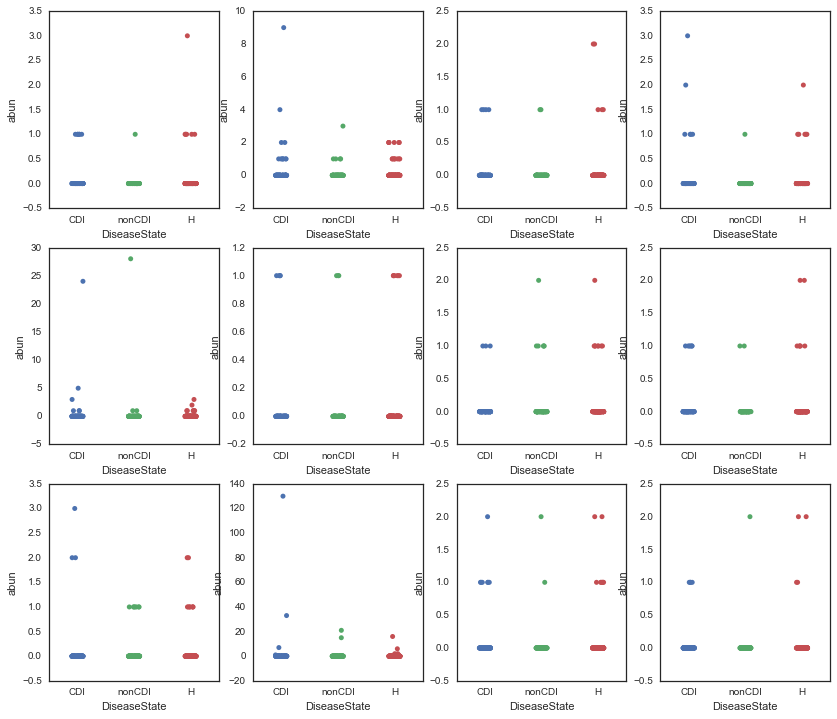

In [91]:
fig, ax = plt.subplots(3, 4, figsize=(14,12))
ax = ax.flatten()

for i in range(len(ax)):
    o = otus[i]
    sns.stripplot(
        data=tidydf.query('otu == @o'), 
        x='DiseaseState', y='abun', 
        ax=ax[i],
        jitter=True)
    

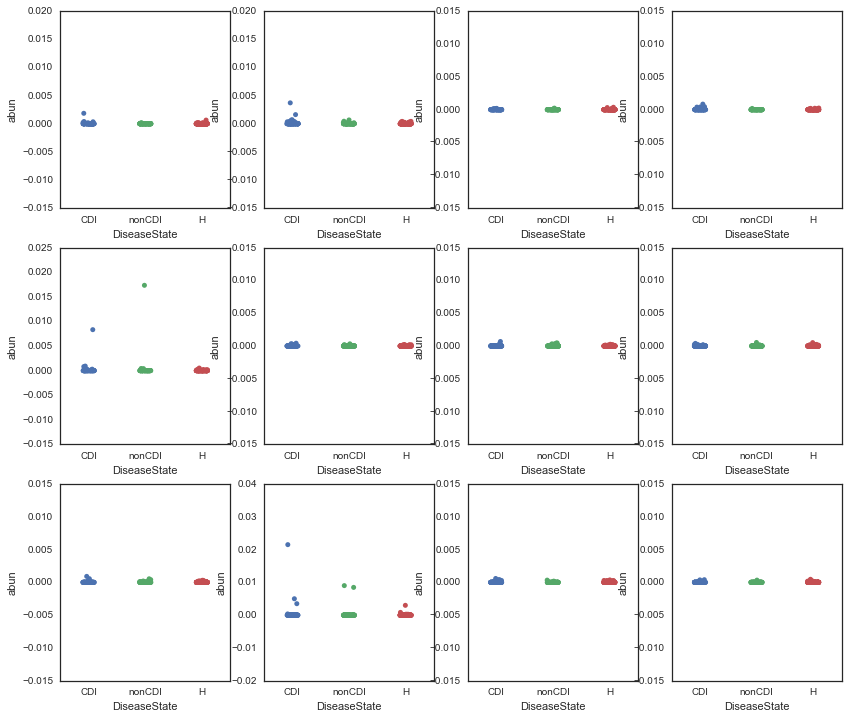

In [92]:
# Tidyfy the realtive abundance OTU table
abundf.index.name = 'sample'
tidyabundf = abundf.reset_index().melt(id_vars='sample', var_name='otu', value_name='abun')
# Add disease state
tidyabundf = tidyabundf.join(meta['DiseaseState'], on='sample')

fig, ax = plt.subplots(3, 4, figsize=(14,12))
ax = ax.flatten()

for i in range(len(ax)):
    o = otus[i]
    sns.stripplot(
        data=tidyabundf.query('otu == @o'), 
        x='DiseaseState', y='abun', 
        ax=ax[i],
        jitter=True)


So these are, for the most part, singletons, maybe?

Let's check that I calculated the ubiquity correctly here..

In [93]:
kept_otus = pvals['otu'].tolist()
df_fromR = df.loc[:, kept_otus]
keep_dis = ['H', 'CDI', 'nonCDI']
df_fromR = df_fromR.loc[meta.query('DiseaseState == @keep_dis').index, :]
df_fromR.shape

# Hm, okay - maybe my problems are coming from
df_fromR.shape, df_fromR.dropna().shape

/Users/claire/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


((337, 3118), (336, 3118))

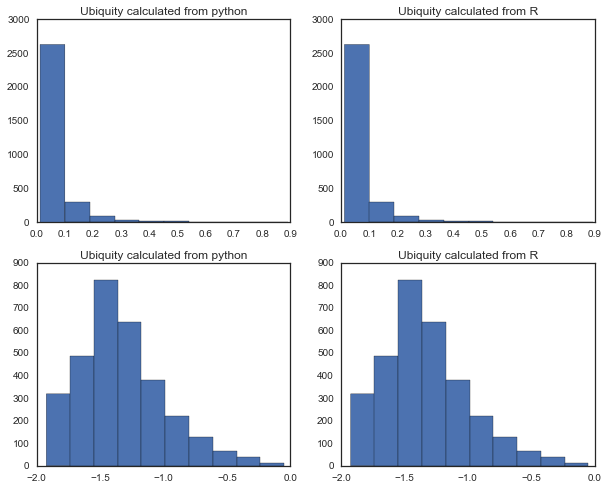

In [94]:
# Recalculate ubiquity with python

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax = ax.flatten()

ax[0].hist((df_fromR.dropna() > 0).sum() / df_fromR.dropna().shape[0])
ax[0].set_title('Ubiquity calculated from python')
ax[1].hist(pvals['ubiquity'])
ax[1].set_title('Ubiquity calculated from R')

ax[2].hist(np.log10((df_fromR.dropna() > 0).sum() / df_fromR.dropna().shape[0]))
ax[2].set_title('Ubiquity calculated from python')
ax[3].hist(np.log10(pvals['ubiquity']))
ax[3].set_title('Ubiquity calculated from R')

Hm, ok - so it looks like they're the same. I didn't mess up the ubiquity calculation...

It looks like the least significant bugs (which get moved down to below q = 0.1) are in the lower covariate group - they have ubiquity = 0.02 - 0.03. I want to look back at the covariate boxplots and see if this makes sense, I guess...?

In [95]:
np.log10(0.02)

-1.6989700043360187

# Uncorrected pvalue vs. corrected pvalue?

In [96]:
pvals.columns

Index([u'otu', u'kingdom', u'phylum', u'class', u'order', u'family', u'genus',
       u'species', u'denovo', u'pval', u'wilcox_teststat', u'SE',
       u'effect_size', u'mean_abun', u'mean_abun_present', u'ubiquity',
       u'test_statistic', u'ind_covariate', u'unadjusted', u'bonf', u'bh',
       u'qvalue', u'ihw-a01', u'ihw-a02', u'ihw-a03', u'ihw-a04', u'ihw-a05',
       u'ihw-a06', u'ihw-a07', u'ihw-a08', u'ihw-a09', u'ihw-a10', u'bl-df02',
       u'bl-df03', u'bl-df04', u'bl-df05', u'lfdr'],
      dtype='object')

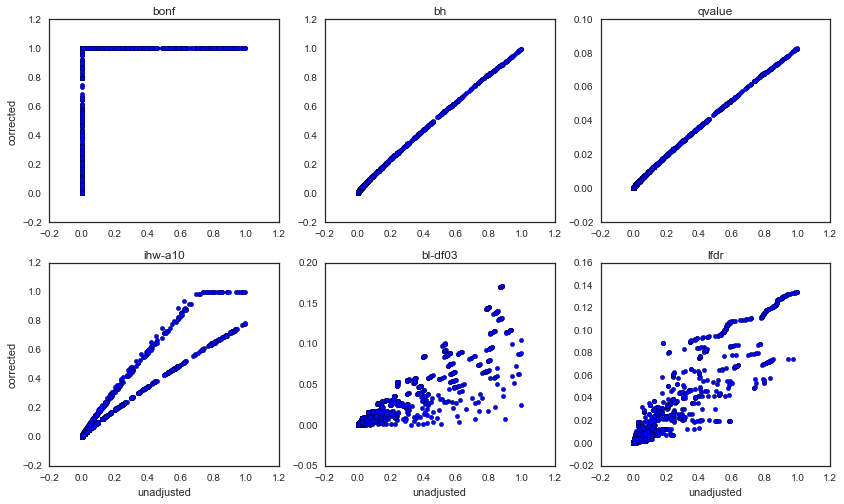

In [97]:
pcols = [u'bonf', u'bh',
       u'qvalue', u'ihw-a10', 
       u'bl-df03', u'lfdr']

fig, ax = plt.subplots(2, 3, figsize=(14, 8))
ax = ax.flatten()

i = 0
for c in pcols:
    ax[i].scatter(pvals['unadjusted'], pvals[c])
    ax[i].set_title(c)

    if i > 2:
        ax[i].set_xlabel('unadjusted')
    if i in [0, 3]:
        ax[i].set_ylabel('corrected')
        
    i += 1


Y-axis is the corrected qvalue (specified in subplot title), x-axis is the original pvalue

## How does qvalue compare to the other more methods?

Specifically, the methods that have more reasonable results...

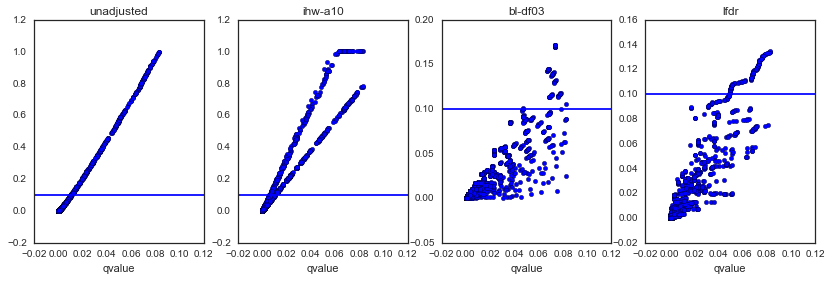

In [98]:
fig, ax = plt.subplots(1, 4, figsize=(14, 4))

pcols = ['unadjusted', 'ihw-a10', 'bl-df03', 'lfdr']

i = 0
for c in pcols:
    ax[i].scatter(pvals['qvalue'], pvals[c])
    ax[i].set_title(c)
    ax[i].axhline(0.1)
    ax[i].set_xlabel('qvalue')
    i += 1


In [99]:
pvals.columns

Index([u'otu', u'kingdom', u'phylum', u'class', u'order', u'family', u'genus',
       u'species', u'denovo', u'pval', u'wilcox_teststat', u'SE',
       u'effect_size', u'mean_abun', u'mean_abun_present', u'ubiquity',
       u'test_statistic', u'ind_covariate', u'unadjusted', u'bonf', u'bh',
       u'qvalue', u'ihw-a01', u'ihw-a02', u'ihw-a03', u'ihw-a04', u'ihw-a05',
       u'ihw-a06', u'ihw-a07', u'ihw-a08', u'ihw-a09', u'ihw-a10', u'bl-df02',
       u'bl-df03', u'bl-df04', u'bl-df05', u'lfdr'],
      dtype='object')

## How does effect size correlate with pvalue and adjusted pvals?

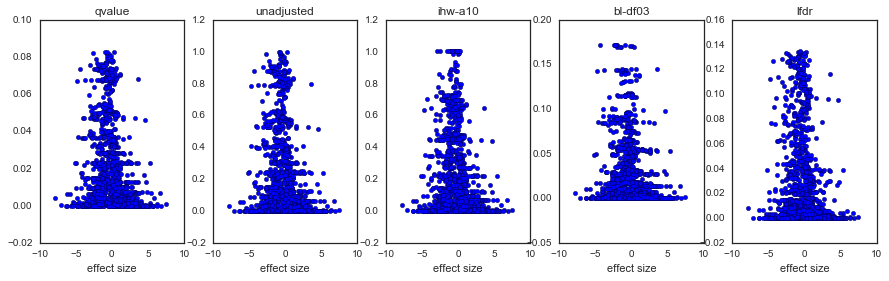

In [100]:
pcols = ['qvalue', 'unadjusted', 'ihw-a10', 'bl-df03', 'lfdr']

fig, ax = plt.subplots(1, len(pcols), figsize=(15, 4))

i = 0
for c in pcols:
    ax[i].scatter(pvals['effect_size'], pvals[c])
    ax[i].set_title(c)
    ax[i].set_xlabel('effect size')
    i += 1


# And covariate?

Ubiquity vs log10(pvalue)


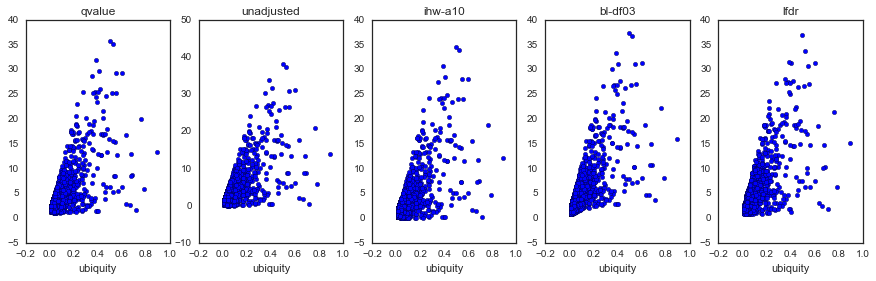

In [101]:
fig, ax = plt.subplots(1, len(pcols), figsize=(15, 4))

i = 0
for c in pcols:
    ax[i].scatter(pvals['ubiquity'], -np.log10(pvals[c]))
    ax[i].set_title(c)
    ax[i].set_xlabel('ubiquity')
    #ax[i]
    i += 1
print('Ubiquity vs log10(pvalue)')

Rank ubiquity vs pvalue


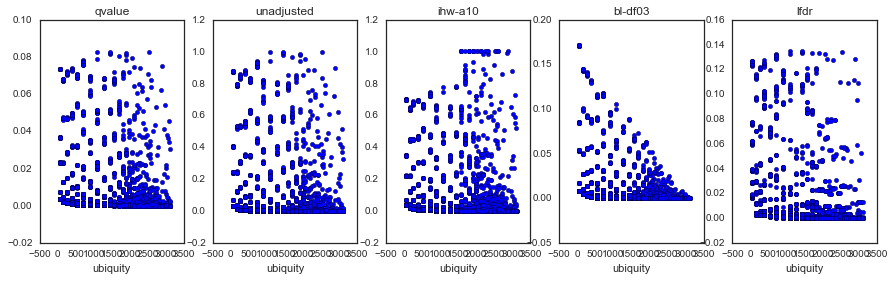

In [102]:
import numpy as np

fig, ax = plt.subplots(1, len(pcols), figsize=(15, 4))

i = 0
for c in pcols:
    ax[i].scatter(pvals['ubiquity'].rank(), pvals[c])
    ax[i].set_title(c)
    ax[i].set_xlabel('ubiquity')
    #ax[i]
    i += 1
print('Rank ubiquity vs pvalue')